# <center>Predict TripAdvisor Rating</center>

Задача: предсказание рейтинга ресторана в TripAdviso

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
22135,id_7729,Paris,['Japanese'],7730.0,$$ - $$$,32.0,"[[""Miyako rue d'Avron is yummy"", 'Excellent se...",/Restaurant_Review-g187147-d783834-Reviews-Miy...,d783834,1,4.0
6130,id_6130,Stockholm,['Indian'],2332.0,$$ - $$$,20.0,"[['Ordinary food', 'We enjoyed a good Take-awa...",/Restaurant_Review-g189852-d8045175-Reviews-La...,d8045175,0,0.0
23309,id_1614,Munich,['German'],1627.0,$$ - $$$,34.0,"[[], []]",/Restaurant_Review-g187309-d953229-Reviews-Wir...,d953229,1,3.5
14901,id_13640,Paris,NaN,13642.0,NaN,15.0,"[['Very bad !!!! RUN', 'Just hit the spotted a...",/Restaurant_Review-g187147-d9881794-Reviews-Th...,d9881794,1,2.5
1937,id_1937,Paris,['Chinese'],11831.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187147-d1035292-Reviews-Ma...,d1035292,0,0.0


# Обработка признаков

In [14]:
# удаляем неинформативные призанки "Restaurant_id", "URL_TA" и "ID_TA"
data.drop(columns = ['Restaurant_id', 'URL_TA', 'ID_TA'], inplace = True)

### 1. City

City: Город

In [15]:
print(data.City.value_counts(dropna=False))
print("Всего городов: ", len(data.City.value_counts()))

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64
Всего городов:  31


Мы видим, что наибольшее количество ресторанов находятся в Лондоне, Париже и Мадриде. Пропуски в этом признаке отсутствуют. Всего городов - 31.

Есть вероятность, что население города влияет на рейтинг ресторана, поэтому введем дополнительный признак **'city_population'**. <br>
Данные о населении городов возьмем из Википедии:

In [16]:
city_population = {'London' : 8908081, 'Paris' : 2148327, 'Madrid' : 3266126, 'Barcelona' : 1636762, 'Berlin' : 3644826, 
'Milan' : 1378689, 'Rome' : 2870500, 'Prague' : 1301132, 'Lisbon' : 505526, 'Vienna' : 1897491, 'Amsterdam' : 872757,
'Brussels' : 179277, 'Hamburg' : 1841179, 'Munich' : 1471508, 'Lyon': 506615, 'Stockholm' : 961609, 'Budapest' : 1752286,
'Warsaw' : 1790658, 'Dublin' : 1173179, 'Copenhagen' : 615993, 'Athens' : 664046, 'Edinburgh' : 488100, 'Zurich' : 428737,
'Oporto' : 237591, 'Geneva' : 200548, 'Krakow' : 779115, 'Oslo' : 673469, 'Helsinki' : 655281, 'Bratislava' : 437725,
'Luxembourg' : 115227, 'Ljubljana' : 284355}

In [17]:
# получаем новый столбец city_population
data['city_population'] = data['City'].replace(city_population)

In [18]:
data.sample(5)

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,city_population
17453,Amsterdam,['Indian'],2463.0,NaN,8.0,"[['Best restaurant period in Amsterdam', 'Good...",1,4.5,872757
42891,Stockholm,"['Mexican', 'Latin', 'Fast Food', 'Central Ame...",51.0,$,386.0,"[['Nice tacos', 'Excellent food and location']...",1,4.0,961609
39748,London,"['Cafe', 'Delicatessen', 'Diner', 'Vegetarian ...",13300.0,NaN,19.0,"[['used to be friendly', 'Good cafe, average s...",1,4.0,8908081
38602,Oporto,"['European', 'Portuguese']",535.0,$,38.0,"[['Good place for breakfast', 'Very friendly']...",1,4.5,237591
11439,London,NaN,12446.0,NaN,NaN,"[['The hun hong , believed to be established.....",1,4.0,8908081


City является категорильный переменной. Поэтому, при помощи фунции get_dummies из признака City можно получить дамми-переменные:

In [19]:
data = pd.get_dummies(data, columns=['City'])

In [20]:
data.sample(5)

,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,city_population,City_Amsterdam,City_Athens,...,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
16729,NaN,2301.0,NaN,11.0,"[['Real Japanese Food', 'Not your usual Japane...",1,5.0,3644826,0,0,...,0,0,0,0,0,0,0,0,0,0
6223,"['Indian', 'Balti', 'Asian', 'Eastern European...",1141.0,$$ - $$$,26.0,"[['Nice place for a lovely takeaway .', 'Just ...",0,0.0,488100,0,0,...,0,0,0,0,0,0,0,0,0,0
9793,NaN,3248.0,NaN,23.0,"[[], []]",0,0.0,1378689,0,0,...,0,0,0,0,0,0,0,0,0,0
18070,NaN,8611.0,NaN,19.0,"[['Meet the locals', 'Disappointing Pulpo a la...",1,2.0,3266126,0,0,...,0,0,0,0,0,0,0,0,0,0
6958,"['Asian', 'Korean']",3195.0,$$ - $$$,10.0,"[['Authentic great', 'Classic Korean BBQ'], ['...",0,0.0,3644826,0,0,...,0,0,0,0,0,0,0,0,0,0


> ### 2. Price Range

Price Range: Цены в ресторане в 3 категориях

In [21]:
data['Price Range'].value_counts(dropna=False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

Признак 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
Пропуски мы заменим на 0.

In [22]:
Prices = {np.nan : 0, '$' : 1, '$$ - $$$' : 2, '$$$$' : 3}
data['Price Range'] = data['Price Range'].replace(Prices)

In [23]:
data.sample(5)

,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,city_population,City_Amsterdam,City_Athens,...,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
48462,"['Japanese', 'Sushi', 'Asian', 'Fusion', 'Vege...",229.0,3,92.0,"[['Amazing', 'Good location with a great view'...",1,4.5,200548,0,0,...,0,0,0,0,0,0,0,0,0,0
23647,['Italian'],8964.0,0,NaN,"[['Amazing'], ['12/16/2017']]",1,5.0,8908081,0,0,...,0,0,0,0,0,0,0,0,0,0
29350,"['Italian', 'European', 'Pizza']",831.0,2,55.0,"[['3 good,start with food, service, price', 'A...",1,4.0,615993,0,0,...,0,0,0,0,0,0,0,0,0,0
22775,"['Italian', 'Vegetarian Friendly']",522.0,2,4402.0,"[['One of my two favorites in Rome', 'Good'], ...",1,4.0,2870500,0,0,...,0,0,0,0,0,1,0,0,0,0
41798,"['Bar', 'International', 'Pub', 'Czech', 'Euro...",859.0,2,48.0,"[['Authentic Çech', 'Friendly staff, Clean, Go...",1,4.0,1301132,0,0,...,0,0,0,0,1,0,0,0,0,0


### 3. Cuisine Style

Cuisine Style: Кухня

In [24]:
print(data['Cuisine Style'].value_counts(dropna=False))
print(type(data['Cuisine Style'][0]))

NaN                                                                                 11590
['Italian']                                                                          1332
['French']                                                                           1019
['Spanish']                                                                           860
['French', 'European']                                                                503
                                                                                    ...  
['Swiss', 'European', 'Central European', 'Contemporary', 'Vegetarian Friendly']        1
['American', 'Bar', 'Contemporary', 'Pub', 'Diner']                                     1
['Steakhouse', 'Barbecue', 'European', 'Spanish']                                       1
['Cafe', 'European', 'Swedish', 'Scandinavian']                                         1
['Italian', 'European', 'Pub', 'Gastropub', 'Bar', 'British']                           1
Name: Cuis

In [25]:
#Заполним пропуски в данном признаке на 'Other':
data['Cuisine Style'] = data['Cuisine Style'].fillna("['Other']")

В признаке 'Cuisine Style' данные представлены типом str. Поэтому, при помощи регулярного выражения преобразуем данные в список.

In [26]:
data['Cuisine Style'] = data['Cuisine Style'].str.findall(r"'([\w\s&]*)'")

In [27]:
pd.Series(data['Cuisine Style'].sum()).value_counts()

Vegetarian Friendly    14021
European               12561
Other                  11590
Mediterranean           7820
Italian                 7433
                       ...  
Fujian                     2
Burmese                    1
Latvian                    1
Xinjiang                   1
Salvadoran                 1
Length: 126, dtype: int64

* Всего "кухонь" с учетом 'other': 126. Самая популярная: Vegetarian Friendly.

Создадим новый признак "number_of_kitchens" - количество кухонь:

In [28]:
data['number_of_kitchens'] = data['Cuisine Style'].apply(lambda x : len(x))

In [29]:
data.sample(5)

,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,city_population,City_Amsterdam,City_Athens,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,number_of_kitchens
49377,"[Contemporary, Mediterranean, Spanish, Europea...",1797.0,2,152.0,"[['Great find', 'Great late night Paella to or...",1,4.5,1636762,0,0,...,0,0,0,0,0,0,0,0,0,6
48933,[Pizza],11638.0,1,24.0,"[['Good food', 'Great prices!'], ['12/17/2017'...",1,3.0,2148327,0,0,...,0,0,1,0,0,0,0,0,0,1
30105,"[Lebanese, Mediterranean, Middle Eastern, Halal]",680.0,2,70.0,"[['Great food', 'First visit'], ['05/27/2017',...",1,4.0,1471508,0,0,...,0,0,0,0,0,0,0,0,0,4
15846,"[Japanese, Sushi]",2559.0,2,53.0,"[['Good sushis'], ['07/15/2016']]",1,4.0,1378689,0,0,...,0,0,0,0,0,0,0,0,0,2
31396,[French],10216.0,2,3.0,"[[], []]",1,4.0,2148327,0,0,...,0,0,1,0,0,0,0,0,0,1


In [30]:
# теперь можно удалить Cuisine Style
data.drop(columns = ['Cuisine Style'], inplace = True)

### 4. Number of Reviews <br>
Number of Reviews: Количество отзывов

In [31]:
# Заполняем пропуски в переменной 'Number of Reviews' средним значением:
data['Number of Reviews'] = data['Number of Reviews'].fillna(data['Number of Reviews'].mean())

In [32]:
data.sample(5)

,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,city_population,City_Amsterdam,City_Athens,City_Barcelona,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,number_of_kitchens
28076,2106.0,2,184.0,"[['Vienna tour', 'Tasty food'], ['01/07/2018',...",1,3.5,1897491,0,0,0,...,0,0,0,0,0,0,1,0,0,3
6741,666.0,0,13.0,"[['Fresh, delicious pizza', 'Build your own de...",0,0.0,1841179,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46718,2553.0,2,7.0,"[['Amazing', 'estupendo!'], ['12/30/2017', '12...",1,5.0,1636762,0,0,1,...,0,0,0,0,0,0,0,0,0,5
26670,2774.0,2,103.0,"[['Always great to go back home', 'Terrible se...",1,3.5,1378689,0,0,0,...,0,0,0,0,0,0,0,0,0,4
28404,2282.0,0,6.0,"[['Superb little bar', 'Great little hole in t...",1,4.5,505526,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 5. Reviews <br>
Reviews: 2 последних отзыва и даты этих отзывов

In [33]:
data['Reviews'].value_counts()

[[], []]                                                                                                                              8112
[['Excellent'], ['09/03/2015']]                                                                                                          2
[['Whenever in Madrid, we never miss this gem...', 'Underrated sushi restaurant with very good...'], ['04/11/2017', '12/02/2016']]       2
[['Improve your service', 'Great value chain restaurant'], ['12/14/2017', '07/30/2017']]                                                 2
[['Healthy vegan doughnuts are posible', 'Best Vegan Donut in the world !!!'], ['11/17/2017', '11/16/2017']]                             2
                                                                                                                                      ... 
[['A great find in the Magna Plaza', 'Small but satisfying'], ['11/06/2017', '01/20/2017']]                                              1
[['The best Italian restaur

В данном столбце попробуем вычленить информацию о разнице во времени между двумя отзывами. <br>
Для начала найдем информацию о времени написания отзывов **'Reviews_first'** и **'Reviews_second'**:

In [34]:
import re


def reviews_date(rew, count):
    date = re.findall(r'\d\d?/\d\d?/\d+', str(rew))
    if len(date) == 0:
        return np.nan
    if count == 1:
        return pd.to_datetime(date[0])
    elif len(date) == 2:
        return pd.to_datetime(date[1])
    else:
        return np.nan
    
    
data['Reviews_first'] = data['Reviews'].apply(lambda x: reviews_date(x, 1))
data['Reviews_second'] = data['Reviews'].apply(lambda x: reviews_date(x, 2))

In [35]:
data.sample(5)

,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,city_population,City_Amsterdam,City_Athens,City_Barcelona,...,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,number_of_kitchens,Reviews_first,Reviews_second
21576,5095.0,2,72.0,"[[], []]",1,4.0,2870500,0,0,0,...,0,0,1,0,0,0,0,2,NaT,NaT
47541,1492.0,0,14.0,"[['Amazing value - great food, lovely atmosph....",1,5.0,3644826,0,0,0,...,0,0,0,0,0,0,0,1,2017-11-23,NaT
26300,5402.0,1,6.0,"[[], []]",1,3.5,3266126,0,0,0,...,0,0,0,0,0,0,0,3,NaT,NaT
1517,1526.0,2,416.0,"[['Great homemade pasta', 'Lovely little resta...",0,0.0,2870500,0,0,0,...,0,0,1,0,0,0,0,4,2017-12-30,2017-10-29
10570,396.0,2,95.0,"[['Portuguese / Alentejo cuisine at its best',...",1,4.5,237591,0,0,0,...,0,0,0,0,0,0,0,4,2018-02-17,2018-01-27


In [38]:
# получим новый признак 'diff_rew' - разница во времени между двумя отзывами
data['diff_rew'] = abs(data['Reviews_first'] - data['Reviews_second']).dt.days

In [43]:
# Мы получили искомую информацию. Удаляем столбцы 'Reviews', 'Reviews_first', 'Reviews_second'
data.drop(columns = ['Reviews', 'Reviews_first', 'Reviews_second'], inplace = True)
# Заполняем пропуски в переменной 'diff_rew' средним значением:
data['diff_rew'] = data['diff_rew'].fillna(data['diff_rew'].mean())

In [44]:
data.sample(5)

,Ranking,Price Range,Number of Reviews,sample,Rating,city_population,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,number_of_kitchens,diff_rew
14555,1155.0,2,485.0,1,4.0,1378689,0,0,0,0,...,0,0,0,0,0,0,0,0,6,152.0
5278,875.0,2,124.0,0,0.0,3266126,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1.0
46874,898.0,1,49.0,1,4.5,1636762,0,0,1,0,...,0,0,0,0,0,0,0,0,4,16.0
36363,395.0,1,139.0,1,4.5,1752286,0,0,0,0,...,0,0,0,0,0,0,0,0,5,36.0
44906,159.0,2,1057.0,1,4.5,8908081,0,0,0,0,...,0,0,0,0,0,0,0,0,6,2.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 39 columns):
Ranking               50000 non-null float64
Price Range           50000 non-null int64
Number of Reviews     50000 non-null float64
sample                50000 non-null int64
Rating                50000 non-null float64
city_population       50000 non-null int64
City_Amsterdam        50000 non-null uint8
City_Athens           50000 non-null uint8
City_Barcelona        50000 non-null uint8
City_Berlin           50000 non-null uint8
City_Bratislava       50000 non-null uint8
City_Brussels         50000 non-null uint8
City_Budapest         50000 non-null uint8
City_Copenhagen       50000 non-null uint8
City_Dublin           50000 non-null uint8
City_Edinburgh        50000 non-null uint8
City_Geneva           50000 non-null uint8
City_Hamburg          50000 non-null uint8
City_Helsinki         50000 non-null uint8
City_Krakow           50000 non-null uint8
City_Lisbon           500

Данные полностью заполнены и готовы к тестированию.

# EDA 

### Посмотрим распределение признака

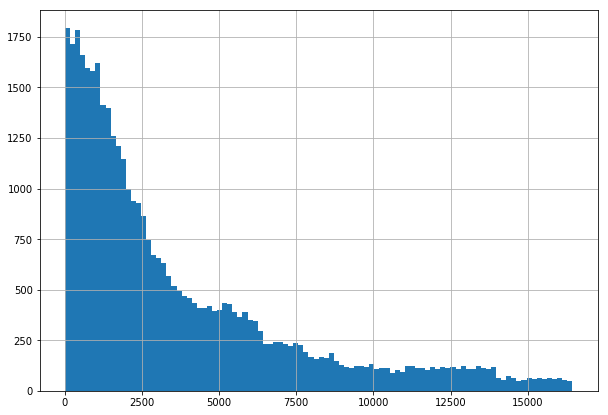

In [46]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

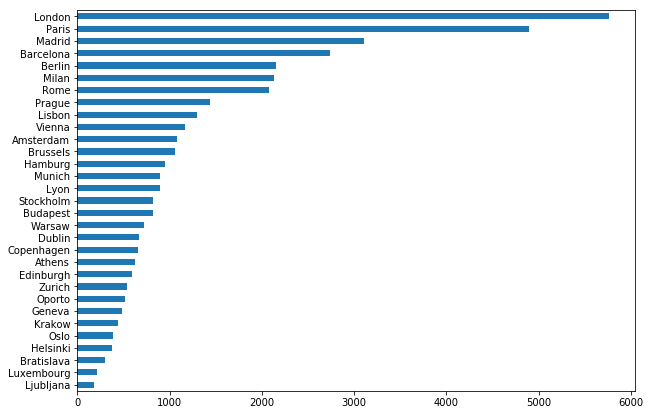

In [47]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

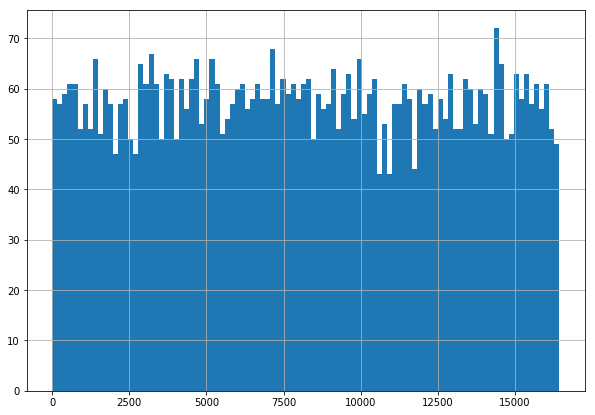

In [48]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

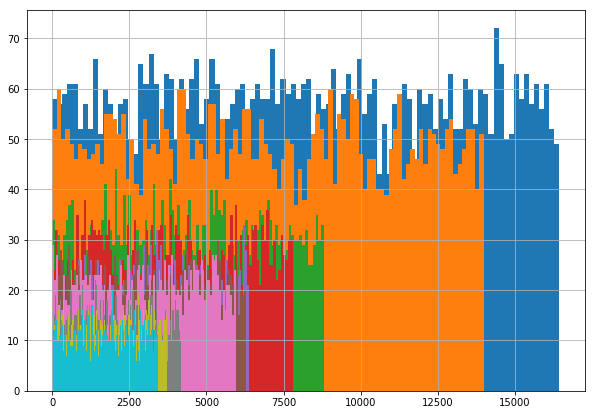

In [49]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

### Посмотрим распределение целевой переменной

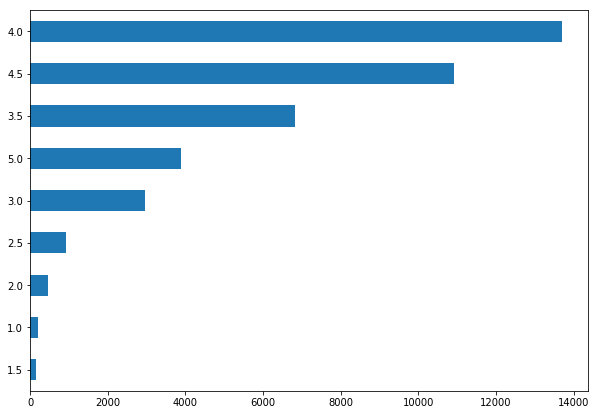

In [50]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

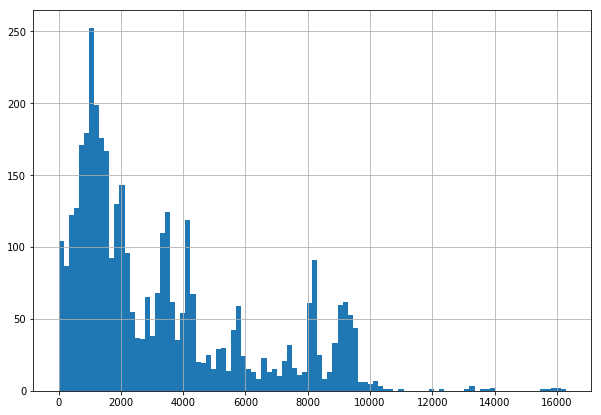

In [51]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

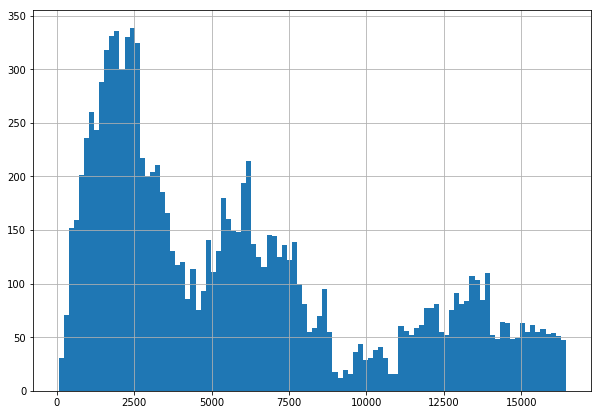

In [52]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### [Корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

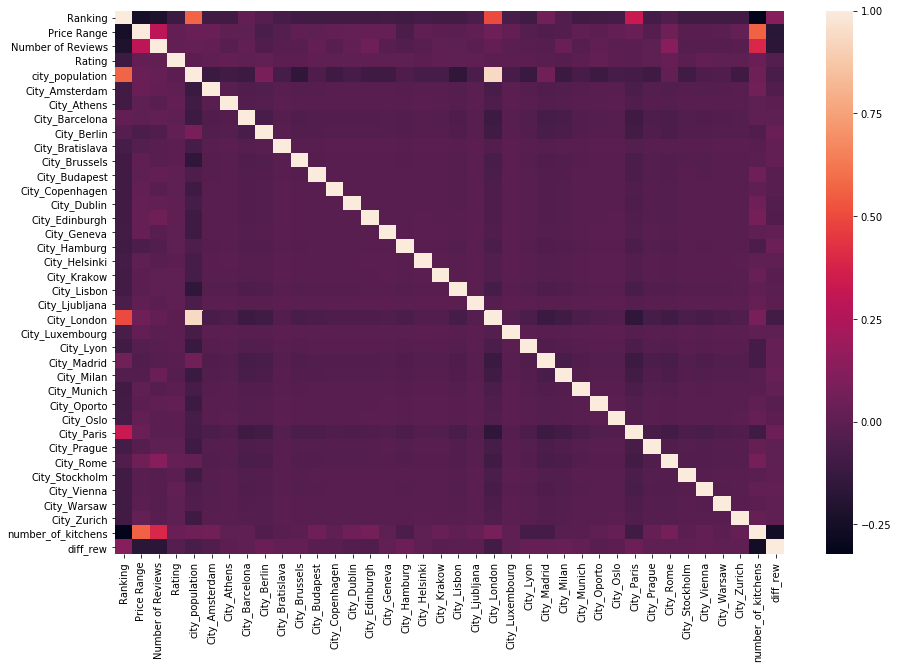

In [53]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

# Data Preprocessing

In [54]:
# Выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [55]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [56]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 38), (40000, 38), (40000, 37), (32000, 37), (8000, 37))

# Model 
Сам ML

In [58]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [59]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [60]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [61]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.211134375


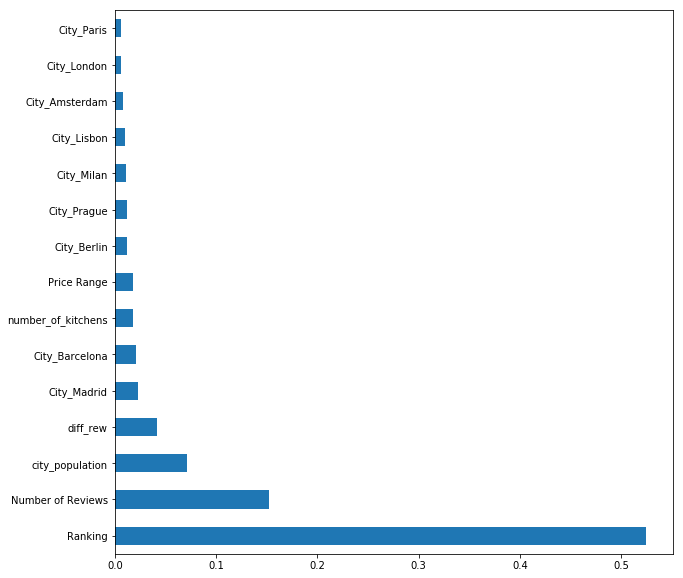

In [62]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission

In [63]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,city_population,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,number_of_kitchens,diff_rew
3921,1722.0,1,25.000000,0.0,872757,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4,22.000000
1035,1663.0,2,39.000000,0.0,1636762,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,250.000000
2418,821.0,0,4.000000,0.0,779115,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,452.000000
6134,6031.0,2,55.000000,0.0,2148327,0,0,0,0,0,...,0,1,0,0,0,0,0,0,5,32.000000
4605,1308.0,1,59.000000,0.0,237591,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,9.000000
1713,783.0,0,3.000000,0.0,779115,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000000
1019,5099.0,0,3.000000,0.0,1636762,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,4.000000
4687,12489.0,0,124.471197,0.0,8908081,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,142.556378
9205,985.0,2,392.000000,0.0,1636762,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,21.000000
3496,7506.0,1,23.000000,0.0,8908081,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,107.000000


In [64]:
test_data = test_data.drop(['Rating'], axis=1)

In [65]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [66]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [67]:
predict_submission

array([3.135, 4.315, 4.54 , ..., 3.055, 4.49 , 4.155])

In [68]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.135
1,id_1,4.315
2,id_2,4.540
3,id_3,4.275
4,id_4,4.460
5,id_5,4.325
6,id_6,1.820
7,id_7,2.470
8,id_8,4.245
9,id_9,4.740
